In [1]:
import pandas as pd

In [2]:
import os
os.getcwd()

'/home/wolfgang/git/kaggle/g_research_crypto_forecasting/notebooks'

In [3]:
pd.options.display.max_columns=100
df = pd.read_csv("../data/processed/train_folds.csv").sort_values(by=["Asset_ID", "timestamp"])
df

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target,datetime,test_fold,test_time_window
5480441,1514764860,0,5.0,8.530000,8.530000,8.530000,8.530000,7.838000e+01,8.530000,-0.014399,2018-01-01 00:01:00,1,-1
6753147,1514764920,0,7.0,8.530000,8.530000,8.514500,8.514500,7.139000e+01,8.520215,-0.015875,2018-01-01 00:02:00,1,-1
3940641,1514764980,0,45.0,8.506500,8.529900,8.484800,8.484800,1.546820e+03,8.501394,-0.015410,2018-01-01 00:03:00,0,-1
1506182,1514765040,0,14.0,8.500900,8.506600,8.474400,8.500900,1.258000e+02,8.479810,-0.012524,2018-01-01 00:04:00,0,-1
6290525,1514765100,0,5.0,8.500700,8.500700,8.456000,8.456000,1.250100e+02,8.458435,-0.005940,2018-01-01 00:05:00,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2746317,1623542100,13,190.0,0.068069,0.068154,0.068050,0.068111,1.822400e+06,0.068112,-0.002471,2021-06-12 23:55:00,0,0
1632592,1623542160,13,97.0,0.068137,0.068170,0.068025,0.068088,1.101536e+06,0.068130,-0.001289,2021-06-12 23:56:00,0,0
19359218,1623542220,13,227.0,0.068011,0.068044,0.067909,0.067967,2.378181e+06,0.067978,-0.003800,2021-06-12 23:57:00,4,0
17214757,1623542280,13,103.0,0.067998,0.068083,0.067950,0.068057,1.382896e+06,0.068037,-0.002785,2021-06-12 23:58:00,3,0


In [4]:
df.groupby("test_time_window").agg({
    "datetime": ["min", "max", "count"]
})

datetime                               
                                  min                  max     count
test_time_window                                                    
-1                2018-01-01 00:01:00  2020-03-19 23:58:00  13452870
 0                2021-03-15 00:00:00  2021-06-12 23:59:00   1814276
 1                2020-12-15 00:00:00  2021-03-14 23:59:00   1813903
 2                2020-09-16 00:00:00  2020-12-14 23:59:00   1787119
 3                2020-06-18 00:00:00  2020-09-15 23:59:00   1744538
 4                2020-03-19 23:59:00  2020-06-17 23:59:00   1608988

In [5]:
df.groupby("Asset_ID").agg({
    "datetime": ["min", "max", "count"]
})

# >> every test split has all assets

datetime                              
                          min                  max    count
Asset_ID                                                   
0         2018-01-01 00:01:00  2021-06-12 23:59:00  1798698
1         2018-01-01 00:01:00  2021-06-12 23:59:00  1812284
2         2018-01-01 00:01:00  2021-06-12 23:59:00  1809539
3         2018-04-17 09:11:00  2021-06-12 23:59:00  1647869
4         2019-04-12 14:34:00  2021-06-12 23:59:00  1012868
5         2018-01-01 00:01:00  2021-06-12 23:59:00  1811142
6         2018-01-01 00:01:00  2021-06-12 23:59:00  1812202
7         2018-01-01 00:01:00  2021-06-12 23:59:00  1807129
8         2018-05-09 08:07:00  2021-06-12 23:59:00  1448354
9         2018-01-01 00:01:00  2021-06-12 23:59:00  1812032
10        2018-05-10 15:21:00  2021-06-12 23:59:00   526954
11        2018-01-01 00:01:00  2021-06-12 23:59:00  1557305
12        2018-02-16 23:53:00  2021-06-12 23:59:00  1634751
13        2018-02-06 21:37:00  2021-06-12 23:59:00  1730567

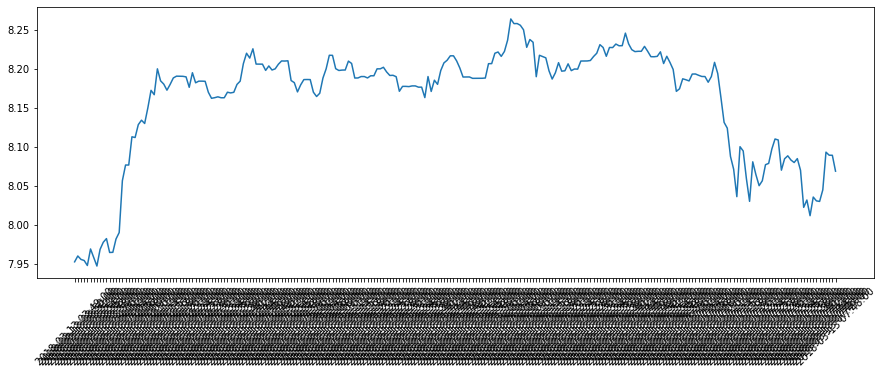

In [6]:
import matplotlib.pyplot as plt

plot_df = df.loc[df["Asset_ID"] == 0,:][100000:100240]

fig, ax = plt.subplots(1, 1, figsize=(15, 5))

ax.tick_params(axis='x', rotation=45)

plt.plot(plot_df.datetime, plot_df.Close)

In [7]:
"""check quality of predictin binary tagert"""

(df.Target == 0).mean()

0.0024356828961824423

In [8]:
from sklearn.model_selection import train_test_split

df = df.dropna(how="any")
y = df["Target"].apply(lambda x: 1 if x > 0 else -1)
df = df[["Asset_ID", "Count", "Open", "High", "Low", "Close", "Volume", "VWAP"]]

df, df_test, y, y_test = train_test_split(df, y, test_size=0.33, random_state=42)

In [9]:
from lightgbm import LGBMClassifier

In [15]:
%%time
model = LGBMClassifier(
    max_depth=10,
    n_estimators=50,
)

model.fit(df, y)

CPU times: user 59 s, sys: 611 ms, total: 59.6 s
Wall time: 6.46 s


LGBMClassifier(max_depth=10, n_estimators=5)

In [14]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, model.predict(df_test)), accuracy_score(y, model.predict(df))

(0.5123953588141325, 0.5134524522470614)